<a href="https://colab.research.google.com/github/AnvayRaj/MLP-Notes/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

* The real world training data is usually not clean and has many issues such as missing values for certain features, features on different scales, non-numeric attributes etc.
* Often there is a need to pre-process the data to make it amenable for training the model.
* Sklearn provides a rich set of transformers for this job.
* The same pre-processing should be applied to both training and test set.
* Sklearn provides pipeline for making it easier to chain multiple transformers together and apply them uniformly across train, eval and test sets.
* Once you get the training data, the first job is to explore the data and list down preprocessing needed.
* Typical problems include:
  * Missing values in features.
  * Numerical features are not on the same scale.
  * Categorical attributes need to be represented with sensible numerical representation.
  * Too many features, reduce them.
  * Extract features from non-numeric data.

Sklearn provides a library of transformers for data preprocessing.

* Data cleaning (`sklearn.preprocessing`) such as standardization, missing value imputation, etc.
* Feature extraction (`sklearn.feature_extraction`)
* Feature reduction (`sklearn.decomposition.pca`)
* Feature expansion (`sklearn.kernel_approximation`)

**Transformer methods**

Each transformer has the following methods:
* `fit()` learns model parameters from a training set.
* `transform()` applies the learnt transformation to the new data.
* `fit_transform()` performs function of both `fit()` and `transform()` methods and is more convenient and efficient to use.

## Part 1: Feature Extraction

`sklearn.feature_extraction` has useful APIs to extract features from data:
* DictVectorizer
* FeatureHasher

### DictVectorizer

Converts lists of mappings of feature name and feature value, into a matrix.

In [1]:
data = [
    {'age': 4, 'height': 96.0},
    {'age': 1, 'height': 73.9},
    {'age': 3, 'height': 88.9},
    {'age': 2, 'height': 81.6},
]

data

[{'age': 4, 'height': 96.0},
 {'age': 1, 'height': 73.9},
 {'age': 3, 'height': 88.9},
 {'age': 2, 'height': 81.6}]

In [2]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
data = dv.fit_transform(data)
data

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [3]:
data.shape

(4, 2)

### FeatureHasher

* High-speed, low-memory vectorizer that uses feature hashing technique.
* Instead of building a hash table of the features as the vectorizers do, it applies a hash function to the features to determine their column index in sample matrices directly.
* This results in increased speed and reduced memory usage, at the expense of inspectability; the hasher doesnot remember what the input features looked like and has no inverse_transform method.
* Output of this transformer is scipy.sparse matrix.

### Feature extraction from images and text

* `sklearn.feature_extraction.image.*` has useful APIs to extract features from image data. Find out more about them in sklearn user guide : [Feature extraction from Images](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.image)
* `sklearn.feature_extraction.text.*` has useful APIs to extract features from text data. Find out more about them in sklearn user guide : [Feature extraction from Text](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

## Part 2: Data Cleaning

### Handling missing values

* Missing values occure due to errors in data capture such as sensor malfunctioning, measurement errors etc.
* Many ML Algorithms do not work with missing data and need all features to be present.
* Discarding records containing missing values would result in loss of valuable training samples.
* sklearn.impute API provides functionality to fill missing values in a dataset.
  * SimpleImputer
  * KNNImputer
    * MissingIndicator provides indicators for missing values.

#### SimpleImputer

* Fills missing values with one of the following strategies: `'mean'`, `'median'`, `'most_frequent'` and `'constant'`.


In [4]:
import numpy as np
import pandas as pd

X = pd.DataFrame({'A':[7, np.nan, 2, 9],'B':[1, 8, np.nan, 6]})
X

,A,B
0,7.0,1.0
1,NaN,8.0
2,2.0,NaN
3,9.0,6.0


In [5]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
si.fit_transform(X)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

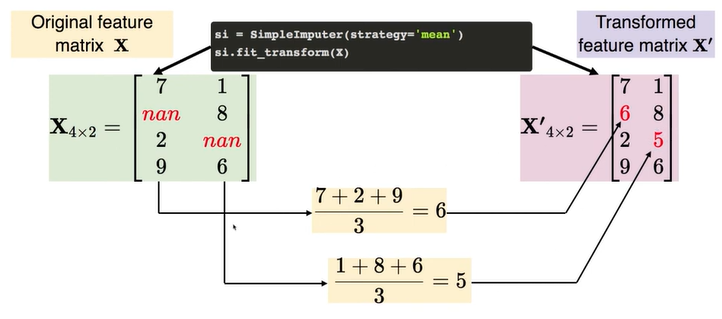

#### KNNImputer

* Uses K-nearest neighbours approach to fill missing values in a dataset.
  * The missing value of an attribute in a specific example is filled with the mean value of the same attribute of `n_neighbours` closest neighbours.
* The nearest neighbours are decided based on Euclidean distance.

In [6]:
X = pd.DataFrame({
    'A':[1, 3, np.nan, 8],
    'B':[2, 4, 6, 8],
    'C':[np.nan, 3, 5, 7],
})
X

,A,B,C
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


Computing Euclidean distance in presence of missing values

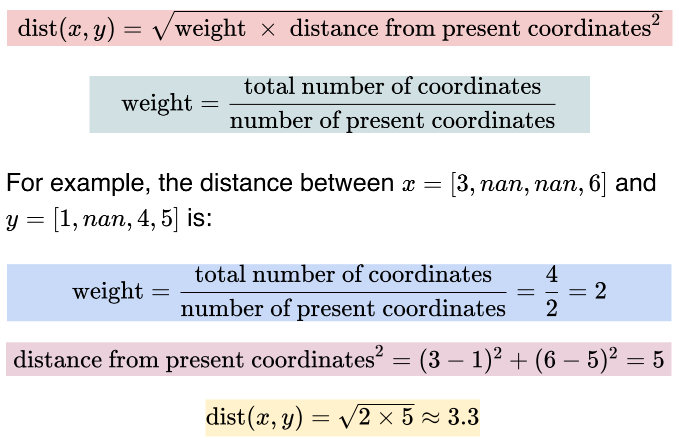

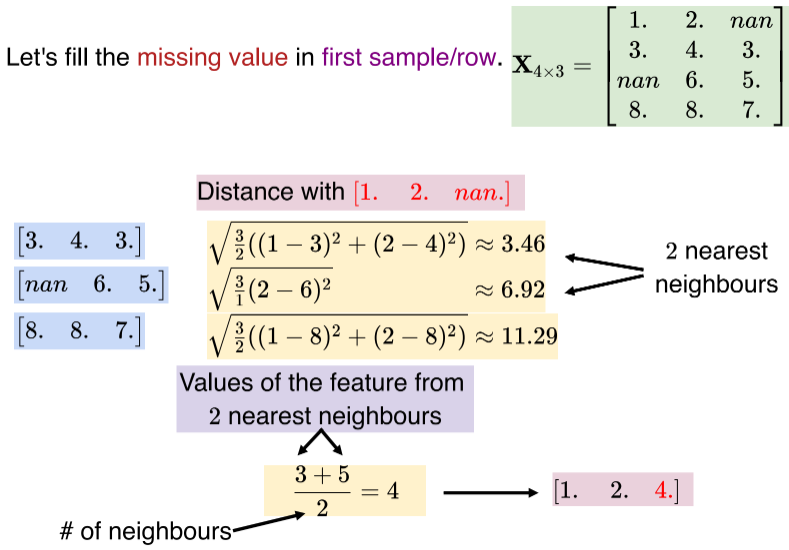

In [7]:
from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors=2, weights="uniform")
knni.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

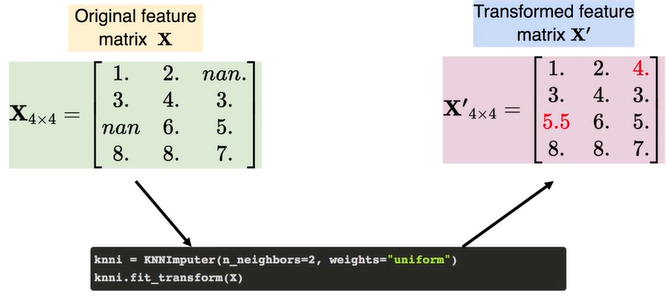

#### Marking imputed values

* It is useful to indicate the presence of missing values in the dataset.
* MissingIndicator helps us get those indications.
  * It returns a binary matrix,
    * True values correspond to missing entries in original dataset.

## Numeric Transformers

1. Feature Scaling
2. Polynomial Transformation
3. Discretization

### Feature Scaling

* Numerical features with different scales lead to slower convergence of iterative optimization procedures.
* It is a good practice to scale numerical features so that all of them are on the same scale.

Let's learn how to scale numerical features using sklearn APIs.

> Three feature scaling APIs are available in sklearn:
* StandardScaler
* MaxAbsScaler
* MinMaxScaler

#### StandardScaler

Transforms the original feature vector `x` into new feature vector `x'` using the following formula:

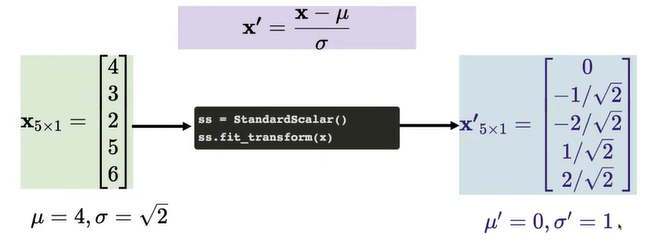

Note: The transformed feature vector `x'` has `mean=0` and `standard deviation=1`.

In [8]:
X = pd.DataFrame({'A': [4, 3, 2, 5, 6]})
X

,A
0,4
1,3
2,2
3,5
4,6


In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.        ],
       [-0.70710678],
       [-1.41421356],
       [ 0.70710678],
       [ 1.41421356]])

The `fit_transform()` method learns the parameters mean and standard deviation to transform the data.

#### MinMaxScaler

It transforms the original feature vector `x` into new feature vector `x'` so that all values fall within range [0, 1].

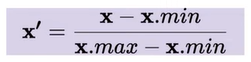

where x.max and x.min are the largest and the smallest values of the feature respectively, of the original feature vector x.

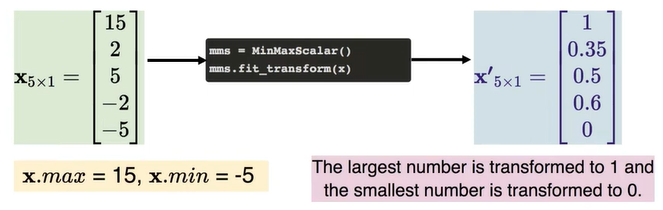

In [10]:
X = pd.DataFrame({'A': [15, 2, 5, -2, -5]})
X

,A
0,15
1,2
2,5
3,-2
4,-5


In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit_transform(X)

array([[1.  ],
       [0.35],
       [0.5 ],
       [0.15],
       [0.  ]])

#### MaxAbsScaler

It transforms the original feature vector `x` into new feature vector `x'` so that all values fall within range [-1,1].

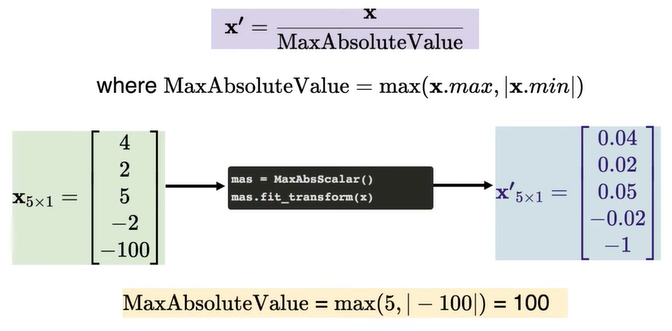

In [12]:
X = pd.DataFrame({'A': [4, 2, 5, -2, -100]})
X

,A
0,4
1,2
2,5
3,-2
4,-100


In [14]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit_transform(X)

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

#### Function Transformer

Constructs a transformed feature by applying a user defined function.

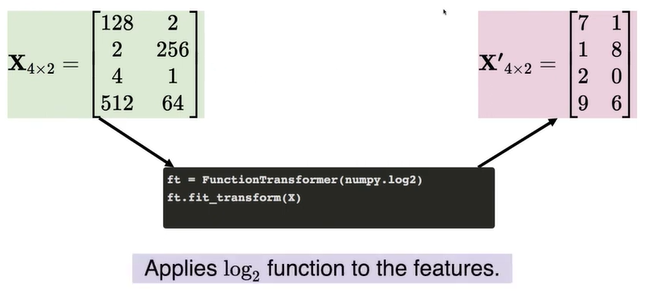

In [15]:
X = pd.DataFrame({'A': [128,2,4,512], 'B': [2,256,1,64]})
X

,A,B
0,128,2
1,2,256
2,4,1
3,512,64


In [16]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(np.log2)
ft.fit_transform(X)

,A,B
0,7.0,1.0
1,1.0,8.0
2,2.0,0.0
3,9.0,6.0


### Polynomial Transformation

Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.


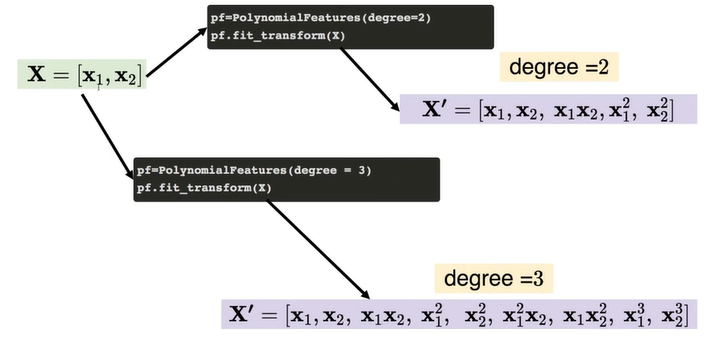

In [18]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
pd.DataFrame(pf.fit_transform(X))

,0,1,2,3,4,5
0,1.0,128.0,2.0,16384.0,256.0,4.0
1,1.0,2.0,256.0,4.0,512.0,65536.0
2,1.0,4.0,1.0,16.0,4.0,1.0
3,1.0,512.0,64.0,262144.0,32768.0,4096.0


In [19]:
pf = PolynomialFeatures(degree=3)
pd.DataFrame(pf.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9
0,1.0,128.0,2.0,16384.0,256.0,4.0,2097152.0,32768.0,512.0,8.0
1,1.0,2.0,256.0,4.0,512.0,65536.0,8.0,1024.0,131072.0,16777216.0
2,1.0,4.0,1.0,16.0,4.0,1.0,64.0,16.0,4.0,1.0
3,1.0,512.0,64.0,262144.0,32768.0,4096.0,134217728.0,16777216.0,2097152.0,262144.0


### Discretization

* Divides a continuous variable into bins.
* One hot encoding or ordinal encoding is further applied to the bin labels.

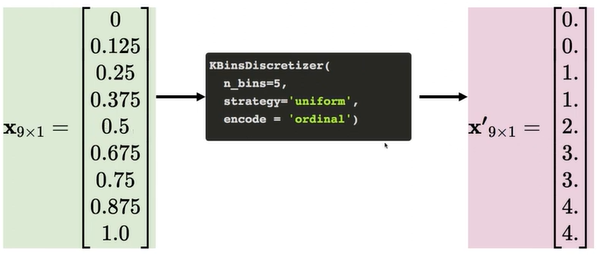

In [20]:
X = pd.DataFrame({'A': [0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]})
X

,A
0,0.000
1,0.125
2,0.250
3,0.375
4,0.500
5,0.675
6,0.750
7,0.875
8,1.000


In [21]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(n_bins=5, strategy="uniform", encode="ordinal")
kbd.fit_transform(X)

array([[0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [4.],
       [4.]])